Exploratory Data Analysis retail_Sample Superstore
#GRIPNOVEMBER2022

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# import necessary libraries
import numpy as np               #for numerical computation
import pandas as pd              #for loading dataset
import matplotlib.pyplot as plt #for visualization
import seaborn as sns            #for visualization
%matplotlib inline

In [3]:
#suppresing the warnings
import warnings
warnings.simplefilter(action='ignore')

Displaying first fivecolumns

In [4]:
# loading dataset
df=pd.read_csv('drive/MyDrive/SampleSuperstore.csv')

# printing first five rows of dataset
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


checking the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


#check if there is any null values


In [6]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

After checking the null values display the final data

In [7]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


it is the time to focus on our main numerical varable like sales, Discount, Profit, sub category and check the mean value and satandard deviation and percentiles of our primary variables.


In [8]:

df[['Sales','Discount','Profit']].describe()

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,229.858001,0.156203,28.656896
std,623.245101,0.206452,234.260108
min,0.444000,0.000000,-6599.978000
25%,17.280000,0.000000,1.728750
50%,54.490000,0.200000,8.666500
75%,209.940000,0.200000,29.364000
max,22638.480000,0.800000,8399.976000


How many unique values presant in our Categorical data

In [9]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

From the above table we can interpret like the country is united states and it is having 3 segments and 3 categories and 49 states and 531 cities are there.

our main goal is to find the weak areas of sales and profit in which regions. first we can plot the bar Graph between region and and sales.

Region
South      241.803645
East       238.336110
West       226.493233
Central    215.772661
Name: Sales, dtype: float64


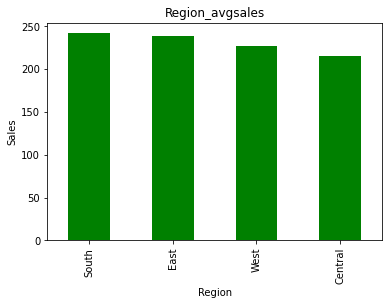

In [10]:
#region_sales
new_df=df.groupby(by="Region")["Sales"].mean().sort_values(ascending=False)
print(new_df)
#Bar Graph Plotting
new_df.plot(kind="bar",color=["green", "green", "green", "green"])
plt.ylabel('Sales')
plt.title('Region_avgsales');

From the above table we can conclude that Central region shows lowest sale and south region shows highest sales. so, our main goal is to focus on weak areas so we focus mainly on central region with the sales of 215.77 which is lowest in all the regions.

our main goal is to find the weak areas of sales and profit in which regions. first we can plot the bar Graph between region and and profit.

Region
West       33.849032
East       32.135808
South      28.857673
Central    17.092709
Name: Profit, dtype: float64


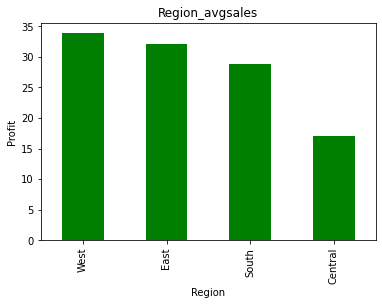

In [11]:
#region_sales
new_df=df.groupby(by="Region")["Profit"].mean().sort_values(ascending=False)
print(new_df)
#Bar Graph Plotting
new_df.plot(kind="bar",color=["green", "green", "green", "green"])
plt.ylabel('Profit')
plt.title('Region_avgsales');

From the above table we can conclude that Central region shows lowest Profit and west region shows highest sales. so, our main goal is to focus on weak areas so we focus mainly on central region with the lowest profit of 17.09. 

Now we can find the sales and profit across differnt states

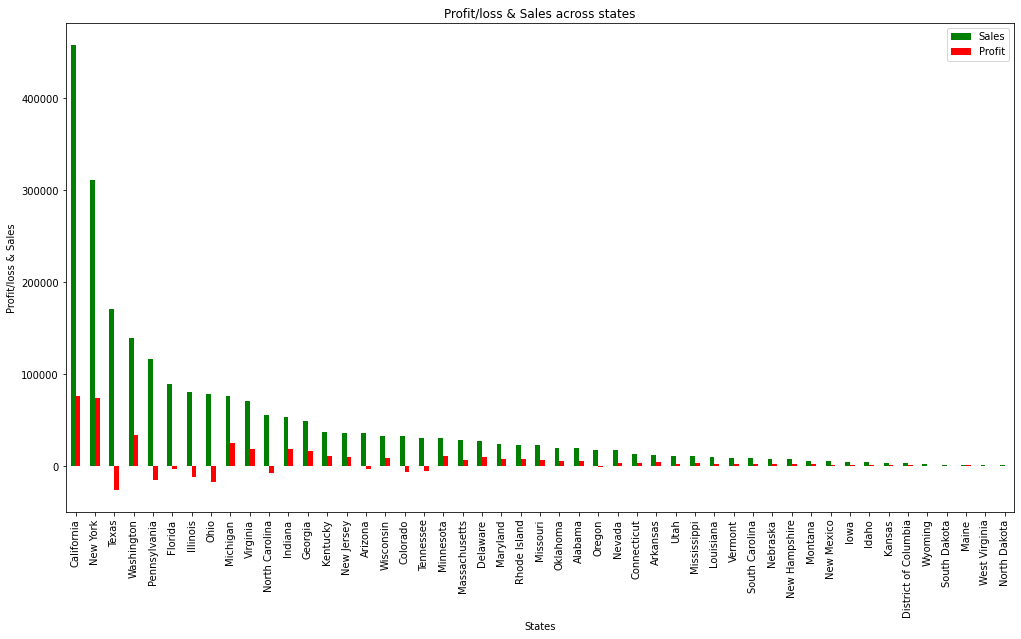

In [12]:
ps = df.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['green','red'],figsize=(17,9))
plt.title('Profit/loss & Sales across states')
plt.xlabel('States')
plt.ylabel('Profit/loss & Sales')
plt.show()

from the above table we can conclude that California state is having higher sales and in profit both California and New york having higher profits and some states like Texas and pennsylvania, Ohio and some other states having less sales.

Now we can find the sales and profit across differnt cities

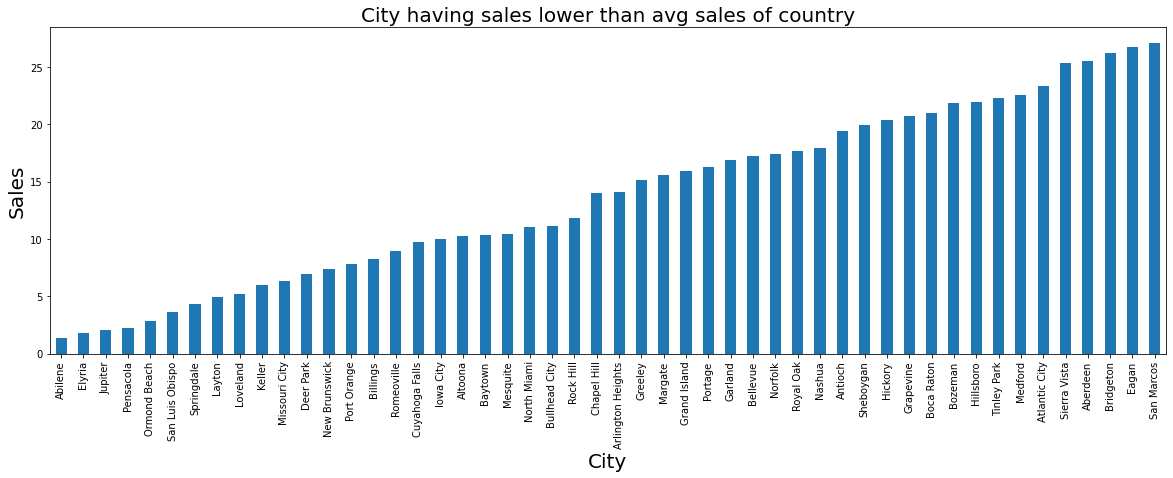

In [14]:
#sales by city
plt.figure(figsize=(20,6))
new_df=df[df['Region']=="Central"]
new_df=df.groupby(by="City")["Sales"].mean().sort_values(ascending=True)


#plotting the graph
new_df[:50].plot(kind="bar")
plt.xlabel('City',size="20")
plt.ylabel('Sales',size="20")
plt.title('City having sales lower than avg sales of country',size="20");

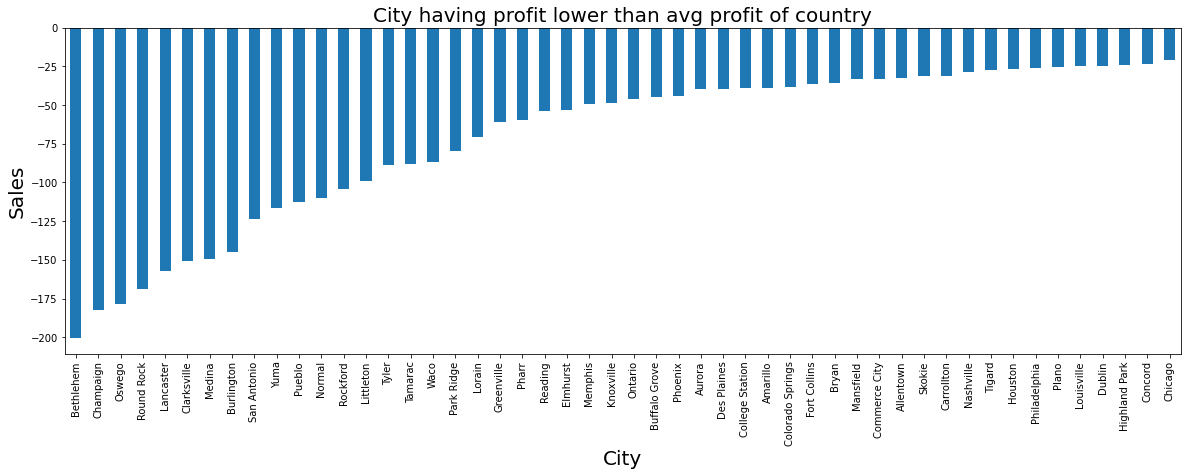

In [15]:
#profit by city
plt.figure(figsize=(20,6))
new_df=df[df['Region']=="Central"]
new_df=df.groupby(by="City")["Profit"].mean().sort_values(ascending=True)

#plotting the graph
new_df[:50].plot(kind="bar")
plt.xlabel('City',size="20")
plt.ylabel('Sales',size="20")
plt.title('City having profit lower than avg profit of country',size="20");

From the above tables we can interpret like Abilene city is having lower sales and Bethlehem city is having lowest profit and San Marcos city is having highest sales and Chicago is having highest profit.

By using the below code we can compare the Sales and Profit with sub-Category

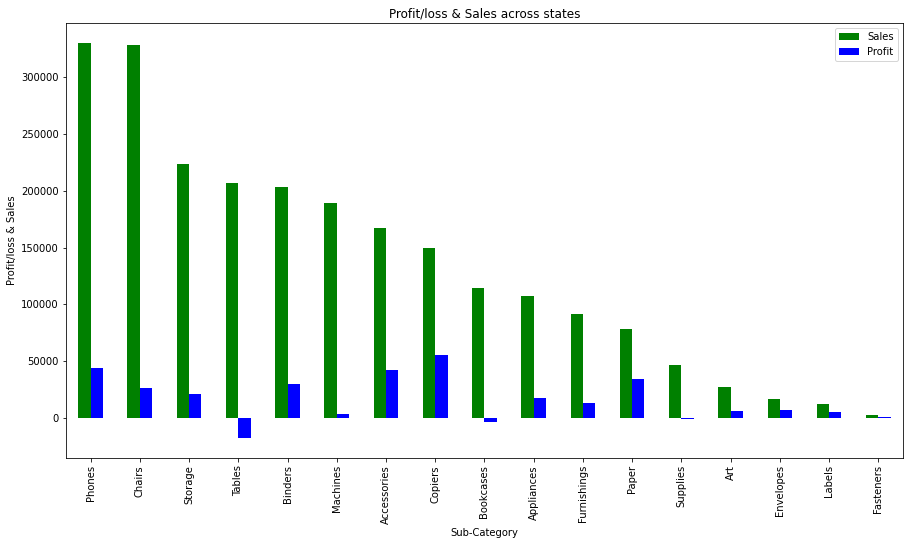

In [16]:
ps = df.groupby('Sub-Category')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['green','blue'],figsize=(15,8))
plt.title('Profit/loss & Sales across states')
plt.xlabel('Sub-Category')
plt.ylabel('Profit/loss & Sales')
plt.show()

From the above bar Graph we can conclude that Tables and Bookcases are having less sales and Profit.




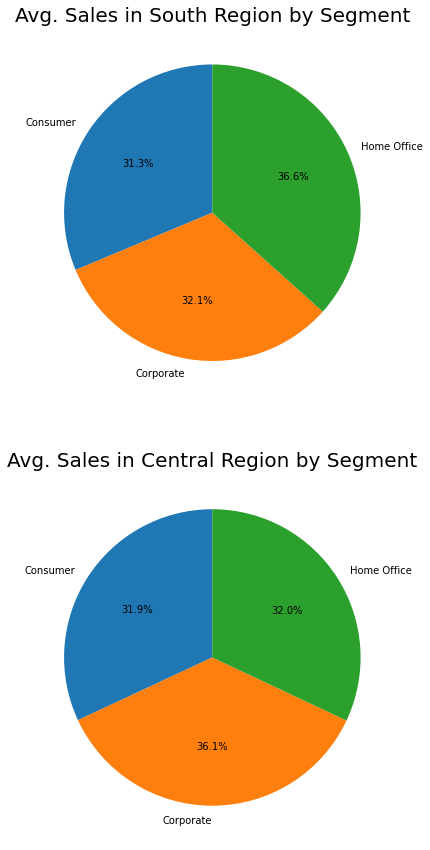

In [18]:
#segment by sales
plt.figure(figsize=(20,15))
ax0=plt.subplot(211)
ax1=plt.subplot(212)

lowest_df=df[df['Region']=="Central"] #since it is the region with least sales
highest_df=df[df['Region']=='South'] #since it is the region with most sales
highest_df=highest_df.groupby(by="Segment")["Sales"].mean()
lowest_df=lowest_df.groupby(by="Segment")["Sales"].mean()

#plotting the graph
highest_df.plot.pie(autopct="%.1f%%",ax=ax0,startangle=90);
ax0.set_ylabel(None)
ax0.set_title('Avg. Sales in South Region by Segment',size="20")
lowest_df.plot.pie(autopct="%.1f%%",ax=ax1,startangle=90);
ax1.set_ylabel(None)
ax1.set_title('Avg. Sales in Central Region by Segment',size="20");

The pi chart shows the distribution of sales comparision between central and south region by different segments.

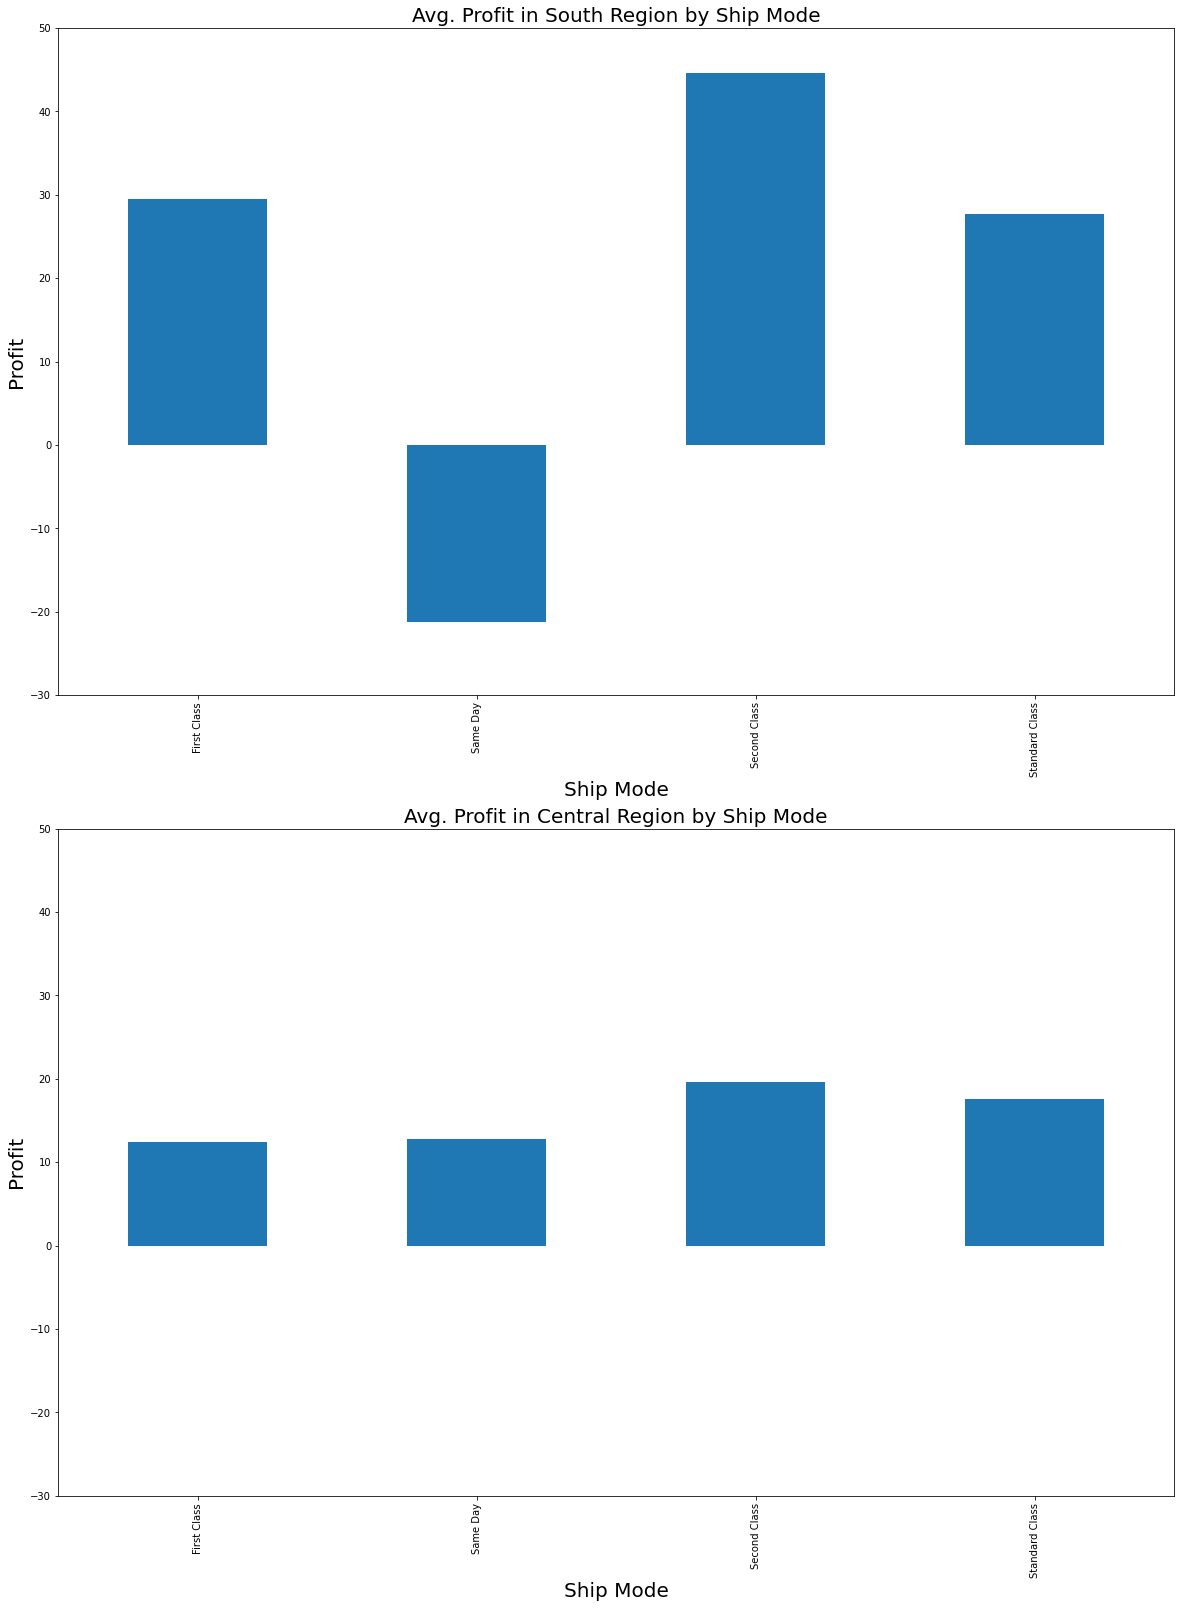

In [20]:
#shipmodes by profit
plt.figure(figsize=(20,27))
ax0=plt.subplot(211)
ax1=plt.subplot(212)

lowest_df=df[df['Region']=="Central"] #since it is the region with least sales
highest_df=df[df['Region']=='South'] #since it is the region with most sales
highest_df=highest_df.groupby(by="Ship Mode")["Profit"].mean()
lowest_df=lowest_df.groupby(by="Ship Mode")["Profit"].mean()

#plotting the graph
highest_df.plot(kind="bar",ax=ax0)
ax0.set_title('Avg. Profit in South Region by Ship Mode',size="20")
ax0.set_xlabel('Ship Mode',size="20")
ax0.set_ylabel('Profit', size="20")
ax0.set_ylim(-30,50);
lowest_df.plot(kind="bar",ax=ax1)
ax1.set_title('Avg. Profit in Central Region by Ship Mode',size="20")
ax1.set_xlabel('Ship Mode',size="20")
ax1.set_ylabel('Profit', size="20")
ax1.set_ylim(-30,50);

The Bar chart shows the distribution of profit comparision between central and south region by Shipmode.

Conclusion:
From the above table we can conclude that Central region shows lowest sale and profit.California state is having higher sales and in profit both California and New york having higher profits and some states like Texas and pennsylvania, Ohio and some other states having less sales. Abilene city is having lower sales and Bethlehem city is having lowest profit and San Marcos city is having highest sales and Chicago is having highest profit.From the above tables we can interpret like Abilene city is having lower sales and Bethlehem city is having lowest profit and San Marcos city is having highest sales and Chicago is having highest profit. the above bar Graph we can conclude that Tables and Bookcases are having less sales and Profit. The pi chart shows the distribution of sales comparision between central and south region by different segments.The Bar chart shows the distribution of profit comparision between central and south region by Shipmode. The Central region is having lowest sales.

